In [ ]:
!git clone 'https://github.com/kevinruiz182/image_processing_tools.git'

import numpy as np
import cv2
import matplotlib.pyplot as plt

Cloning into 'image_processing_tools'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 122 (delta 2), reused 10 (delta 2), pack-reused 108
Receiving objects: 100% (122/122), 46.98 MiB | 33.34 MiB/s, done.
Resolving deltas: 100% (15/15), done.


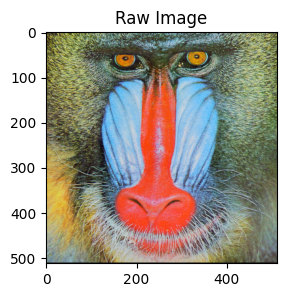

In [ ]:
img = cv2.imread('/content/image_processing_tools/images/fundamentals/baboon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(3,3))

ax = []
ax.append(fig.add_subplot(1, 1, 1))
ax[-1].set_title("Raw Image")
plt.imshow(img)

plt.show()

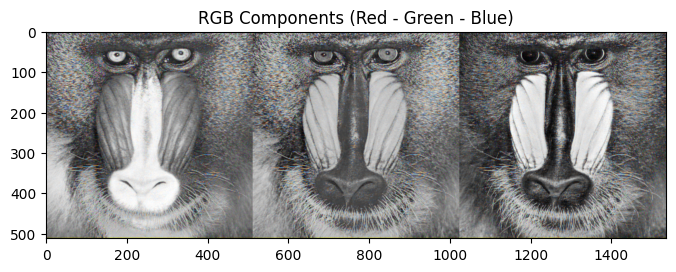

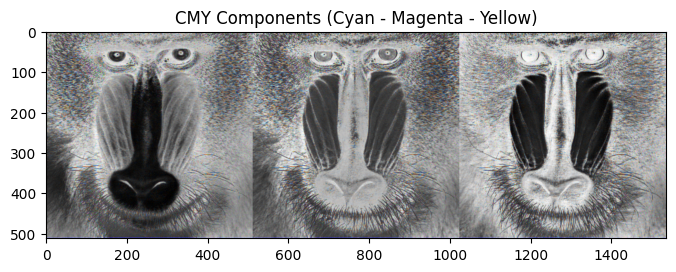

mediaRed: 137
mediaGreen: 129
mediaBlue: 113
mediaCyan: 117
mediaMagenta: 126
mediaYellow: 142


mediaRed: 0.539
mediaGreen: 0.505
mediaBlue: 0.444
mediaCyan: 0.461
mediaMagenta: 0.495
mediaYellow: 0.556


In [ ]:
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

normR = R/255
normG = G/255
normB = B/255

normC = np.ones((512,512)) - normR
normM = np.ones((512,512)) - normG
normY = np.ones((512,512)) - normB

grayR = cv2.cvtColor(R, cv2.COLOR_BAYER_BG2RGB_EA)
grayG = cv2.cvtColor(G, cv2.COLOR_BAYER_BG2RGB_EA)
grayB = cv2.cvtColor(B, cv2.COLOR_BAYER_BG2RGB_EA)

C = np.uint8(255*normC)
M = np.uint8(255*normM)
Y = np.uint8(255*normY)

grayC = cv2.cvtColor(C, cv2.COLOR_BAYER_BG2RGB_EA)
grayM = cv2.cvtColor(M, cv2.COLOR_BAYER_BG2RGB_EA)
grayY = cv2.cvtColor(Y, cv2.COLOR_BAYER_BG2RGB_EA)

fig = plt.figure(figsize=(8,8))
ax = []
ax.append(fig.add_subplot(1, 1, 1))
ax[-1].set_title("RGB Components (Red - Green - Blue)")
plt.imshow(np.concatenate([grayR, grayG, grayB], axis=1))
plt.show()

fig = plt.figure(figsize=(8,8))
ax = []
ax.append(fig.add_subplot(1, 1, 1))
ax[-1].set_title("CMY Components (Cyan - Magenta - Yellow)")
plt.imshow(np.concatenate([grayC, grayM, grayY], axis=1))
plt.show()

for (color,bayer) in [('Red',R),('Green',G),('Blue',B),
                    ('Cyan',C),('Magenta',M),('Yellow',Y)]:
  sum = 0
  for i in range(512):
    for j in range(512):
      sum += bayer[i,j]

  med = sum/(512*512)
  print(f'media{color}: {round(med)}')

print('\n')
for (color,bayer) in [('Red',normR),('Green',normG),('Blue',normB),
                    ('Cyan',normC),('Magenta',normM),('Yellow',normY)]:
  sum = 0
  for i in range(512):
    for j in range(512):
      sum += bayer[i,j]

  med = sum/(512*512)
  print(f'media{color}: {round(med,3)}')